# Question Answer Retrieval

- You can input a query or a question. The script then uses semantic search to find relevant passages in Simple English Wikipedia (as it is smaller and fits better in RAM)
- https://huggingface.co/models?library=sentence-transformers&sort=downloads
- we use: `nq-distilbert-base-v1`

- It was trained on the Natural Questions dataset, a dataset with real questions from Google Search together with annotated data from Wikipedia providing the answer. For the passages, we encode the Wikipedia article tile together with the individual text passages.

- Train Dataset: https://ai.google.com/research/NaturalQuestions/dataset
- Test Dataset: http://sbert.net/datasets/

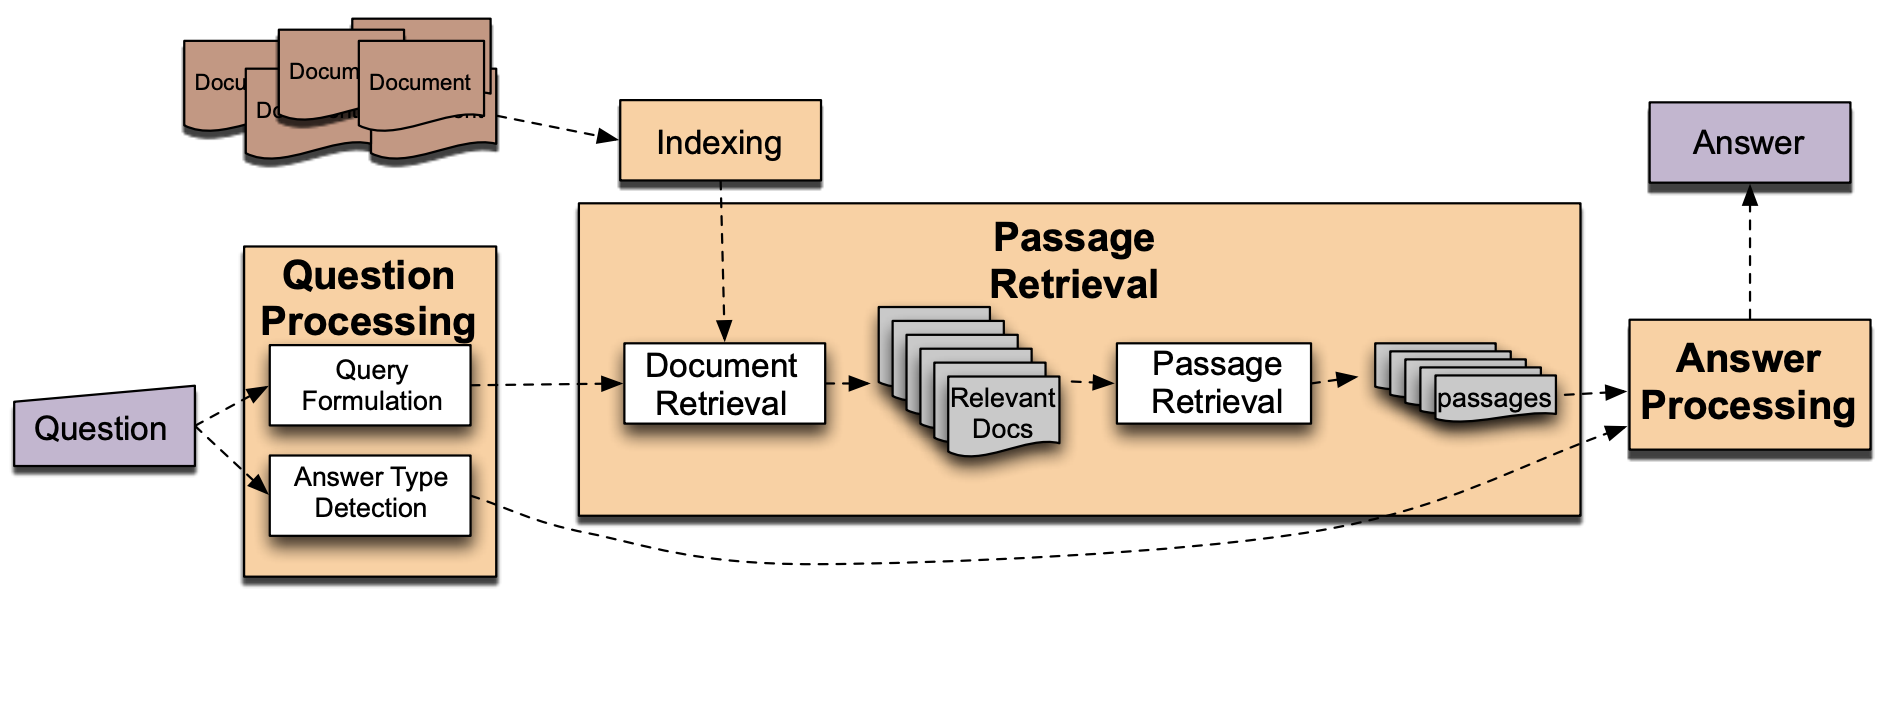

In [ ]:
# https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/simplewiki-2020-11-01.jsonl.gz

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
import os
import json
import gzip

In [ ]:
util.http_get('https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/simplewiki-2020-11-01.jsonl.gz', 'simplewiki-2020-11-01.jsonl.gz')

In [ ]:
model = SentenceTransformer('nq-distilbert-base-v1')

In [ ]:
passages = []
with gzip.open('simplewiki-2020-11-01.jsonl.gz', 'rt', encoding='utf8') as file:
  for line in file:
    data = json.loads(line.strip())
    #print(data)
    for paragraph in data['paragraphs']:
      passages.append([data['title'], paragraph])
    #break

In [ ]:
len(passages)

In [ ]:
from random import shuffle
shuffle(passages)

In [ ]:
passages = passages[0:100_000]

In [ ]:
len(passages)

In [ ]:
corpus_embeddings = model.encode(passages, convert_to_tensor=True, show_progress_bar=True)

In [ ]:
def get_answer(query):

  question_embedding = model.encode(query, convert_to_tensor=True)
  hits = util.semantic_search(question_embedding, corpus_embeddings, top_k=3)[0]

  print("Results:")
  for hit in hits:
    print(passages[hit['corpus_id']])

In [ ]:
get_answer("what is capital of India")

In [ ]:
get_answer("when did the cold war end?")

In [ ]:
get_answer("when did the world war end?")